In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import spacy
nlp = spacy.load("fr_core_news_lg")

In [3]:
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French
import string

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

In [7]:
#data=pd.read_pickle("../data/Text_clean0.pkl")
data=pd.read_pickle('../data/tags_only1.pkl')

In [10]:
#data_np=data.to_numpy()
data_np=np.load('../../data/data_proc1.npy')

In [12]:
data_np[1]

'2020 2026_elus grand chambéry grand chambéry jeu données présente conseillers communautaires communauté agglomération grand issus élections municipales 15/03/2020 28/06/2020 représentation organismes syndicats grand membre    données issues pv installation conseils municipaux conseil communautaire délibérations conseil communautaire répertoire national elus rne mis jour dés modification .. administration citoyennete election elu e s epci finances publiques gouvernement '

In [13]:
import progressbar
bar = progressbar.ProgressBar(maxval=len(data_np), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

In [ ]:
vectors=[]
bar.start()
for i in range(len(data_np)):
    vectors.append(nlp(str(data_np[i])).vector)
    bar.update(i+1)
bar.finish()

In [18]:
vectors=np.array(vectors)

In [24]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=20)
pca.fit(vectors)
vectors_pca=pca.transform(vectors)

In [30]:
vectors_pca[54]

array([-0.34225792, -1.4519873 , -0.3732504 ,  1.9671643 ,  1.0839269 ,
       -0.55468297,  1.0800064 , -0.03858316,  1.074525  ,  0.1656121 ,
       -1.0429292 ,  1.4483024 , -0.35335657,  0.09251104, -0.19433525,
        0.04678692,  0.7067726 , -0.05115139, -1.9799377 ,  1.9120343 ],
      dtype=float32)

In [31]:
import numpy as np
from sklearn.manifold import TSNE
vectors_embedded = TSNE(n_components=2).fit_transform(vectors_pca)

In [25]:
from scipy import spatial
print(1-spatial.distance.cosine(vectors[53], vectors[73]))

0.46182551980018616


In [81]:
from numpy import random
val=np.random.randint(len(data_np))
print(val)
print(data_np[val][:50])
sample_vec=nlp(data_np[val])

30415
Plan local d'urbanisme de la commune de Bouttencou


In [82]:
tokens=[]
for token in sample_vec:
    tokens.append(token.vector)

In [83]:
import numpy as np
from sklearn.manifold import TSNE
tokens_embedded = TSNE(n_components=2).fit_transform(tokens)

In [87]:
vectors_embedded.shape

(42837, 2)

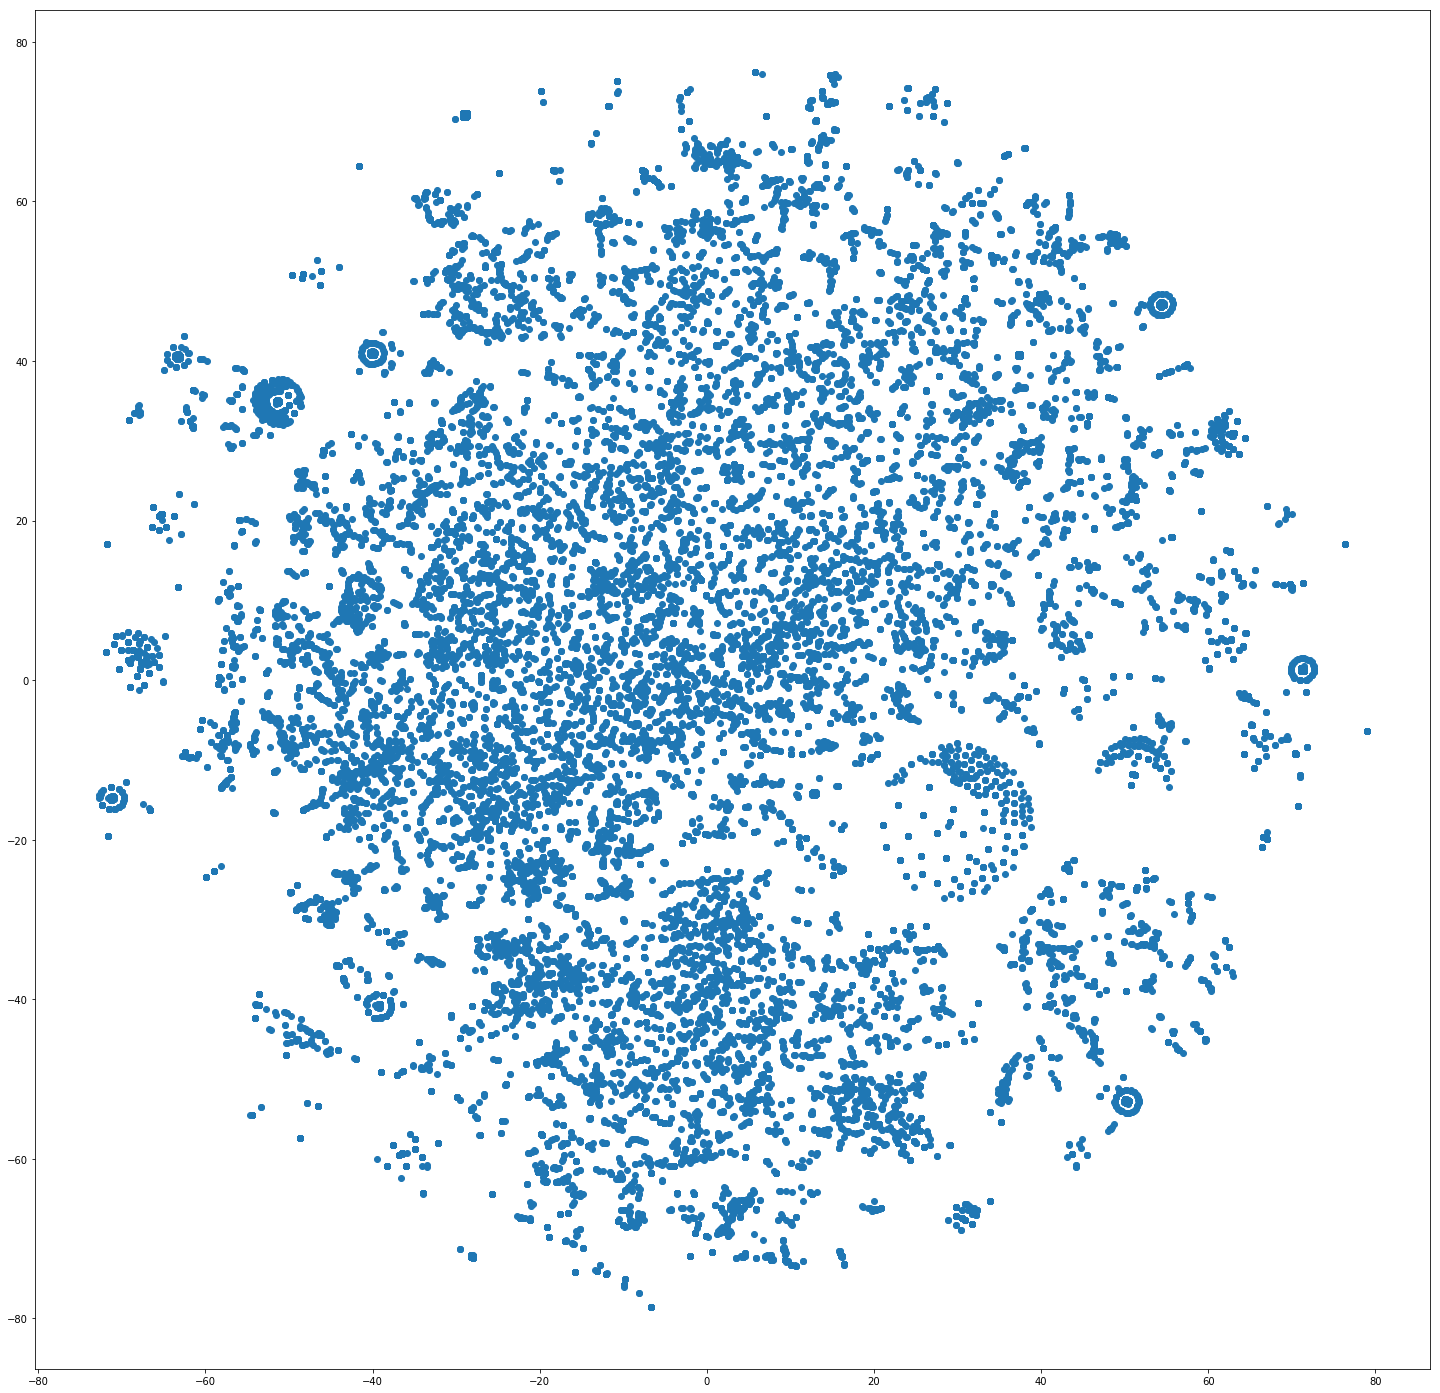

In [32]:
plt.figure(figsize=(25,25))
plt.scatter(vectors_embedded[:,0], vectors_embedded[:,1])

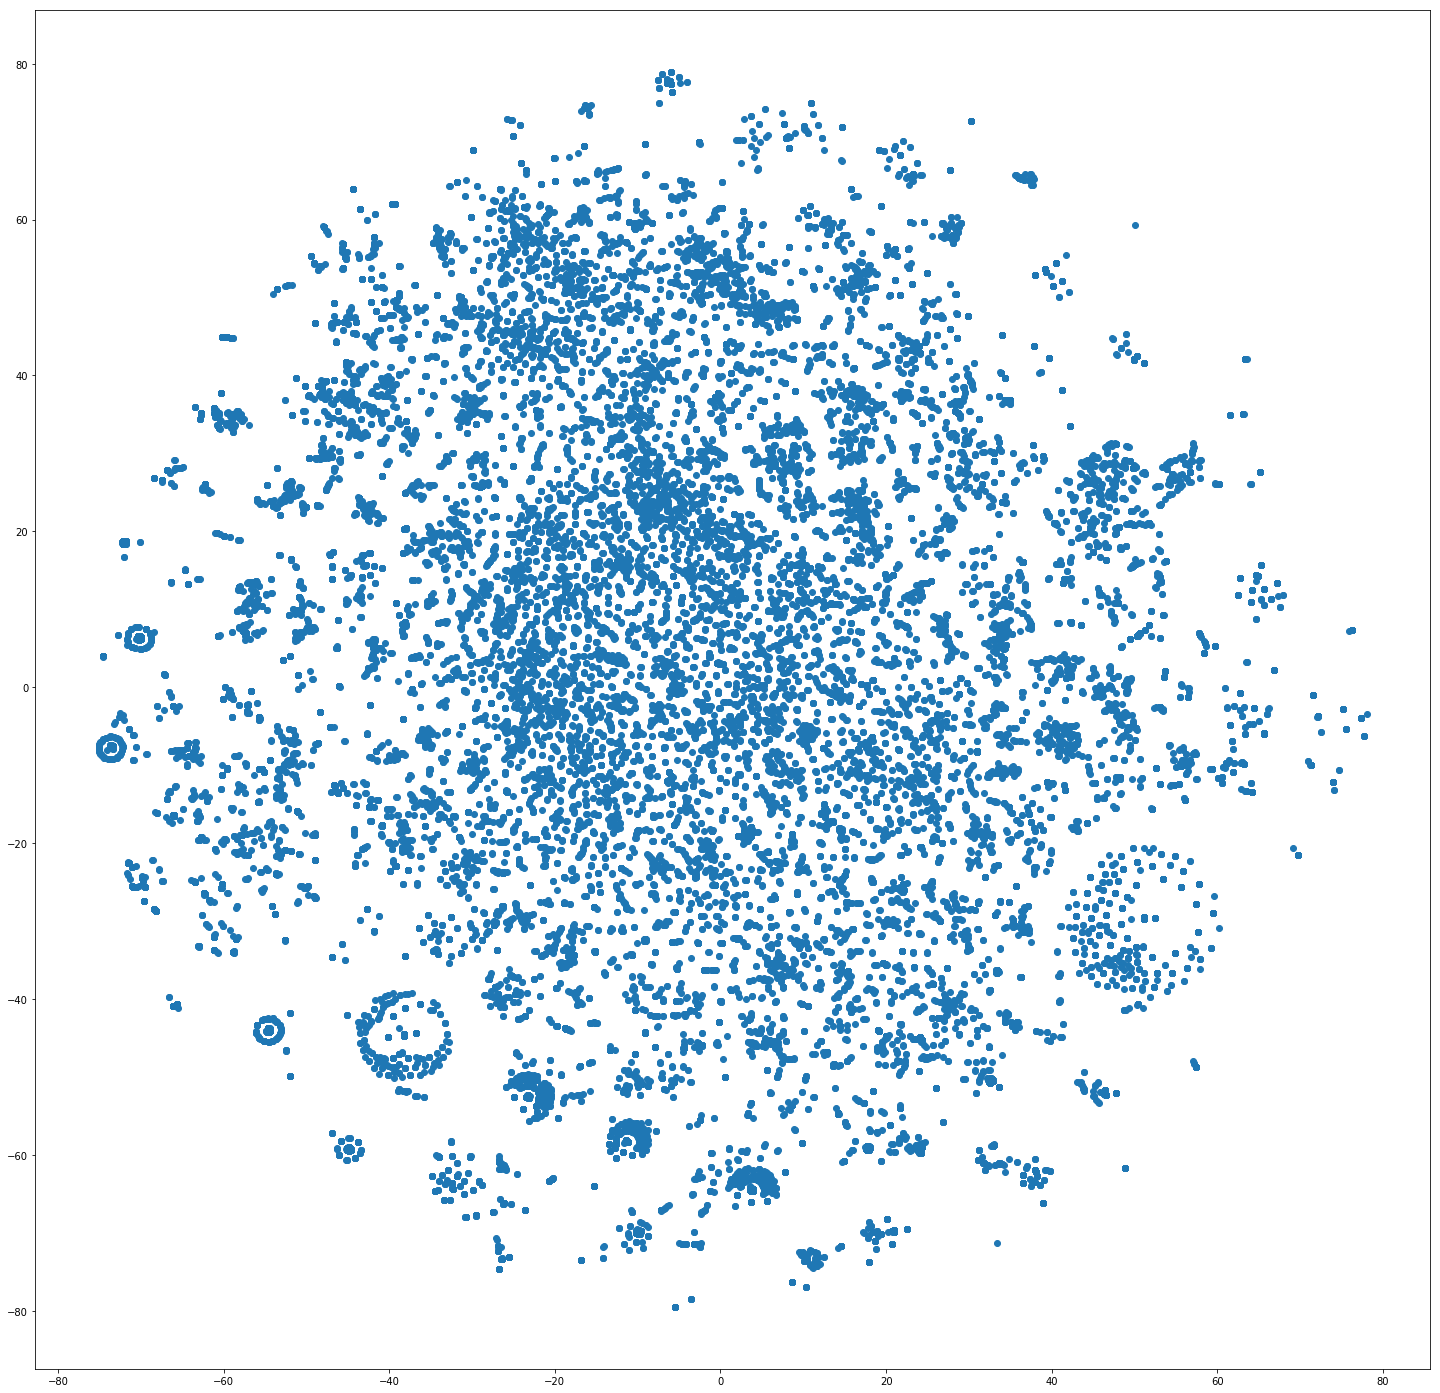

In [20]:
plt.figure(figsize=(25,25))
plt.scatter(vectors_embedded[:,0], vectors_embedded[:,1])

In [92]:
np.save('../src/vectors_embedded.npy', vectors_embedded, allow_pickle=True)

In [97]:
spacy.displacy.render(nlp(data_np[25]), style='ent',jupyter=True)

In [106]:
# Parser for reviews
parser = French()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [108]:
parsed = spacy_tokenizer(data_np[25])

In [109]:
spacy.displacy.render(nlp(parsed), style='ent',jupyter=True)

In [113]:
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words=stopwords, lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(wines["processed_description"])

ValueError: Iterable over raw text documents expected, string object received.